In [3]:
#load libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [26]:
#load datasets
data= pd.read_csv('forest data.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
#list of columns
print(data.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:


#shape of data
data.shape



(581012, 55)

In [8]:
#checking for null/missing values
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:


#check mising values
print(list(data.isnull().any()))
#dropping index with null values
data = data.dropna()


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [10]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

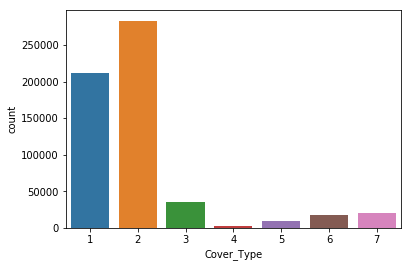

In [12]:


#count plot of target
sb.countplot(x='Cover_Type', data=data)
plt.show()



In [13]:
#Take some column
col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [14]:


train = data[col]



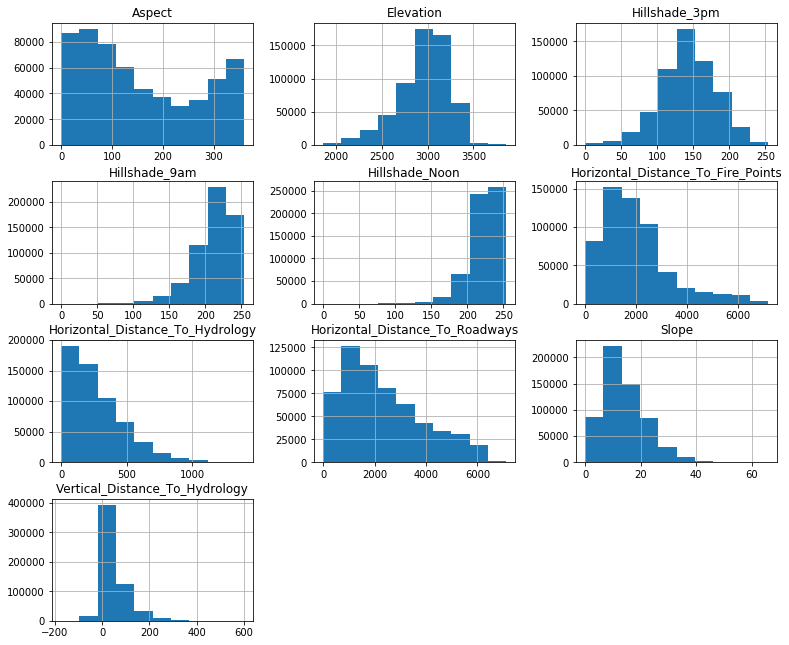

In [15]:
#histogram
train.hist(figsize=(13, 11))
plt.show()

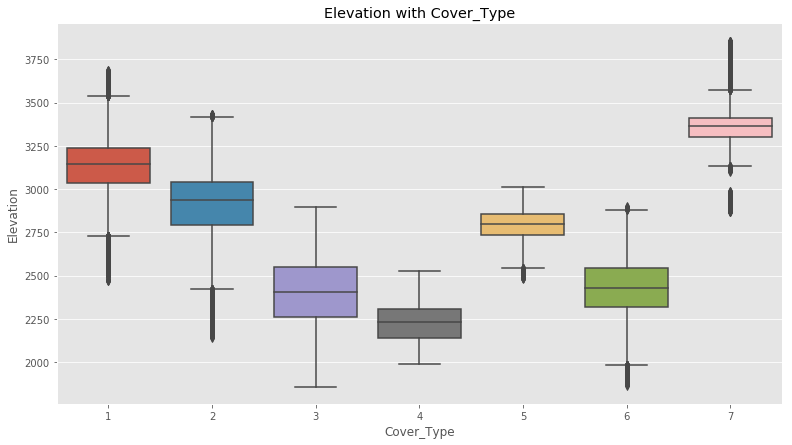

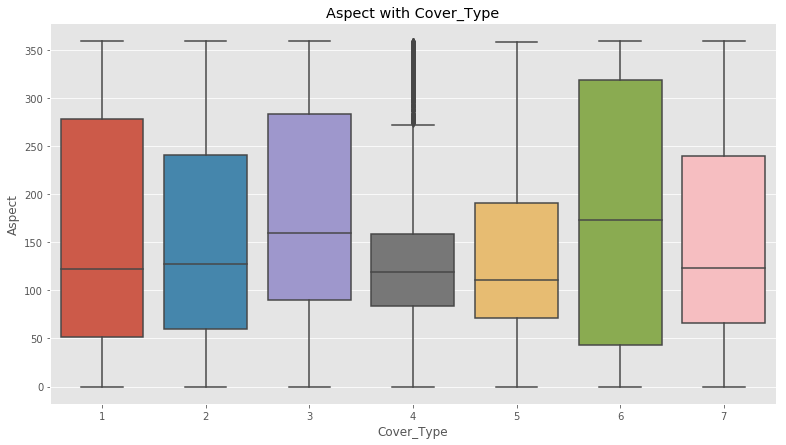

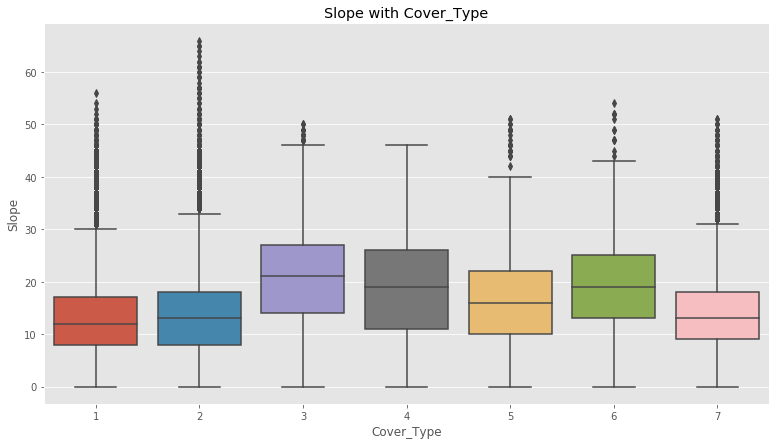

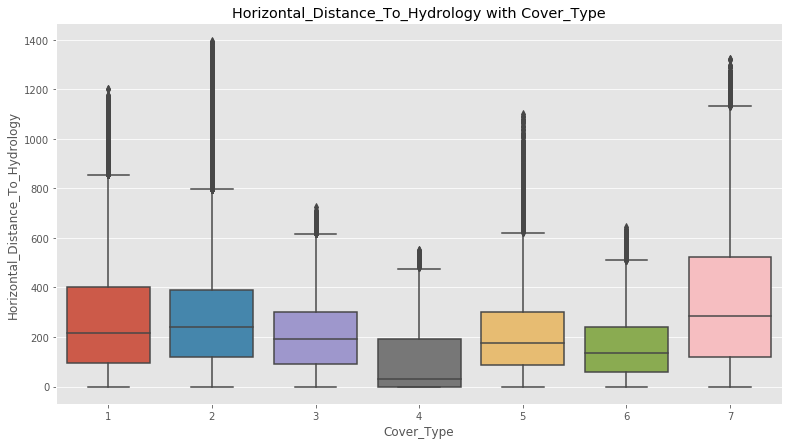

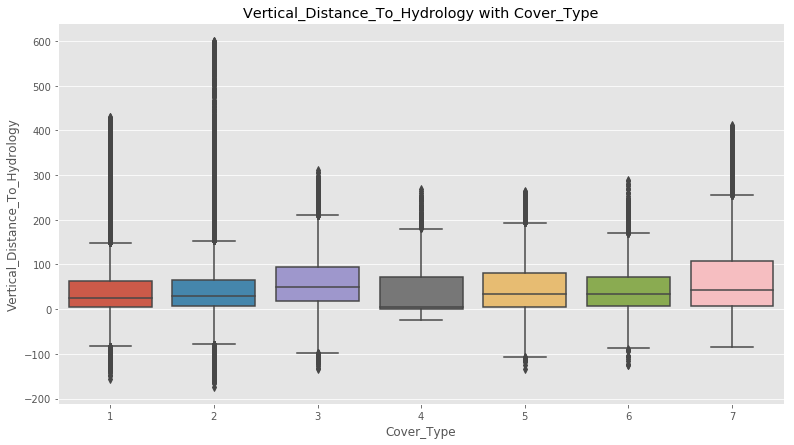

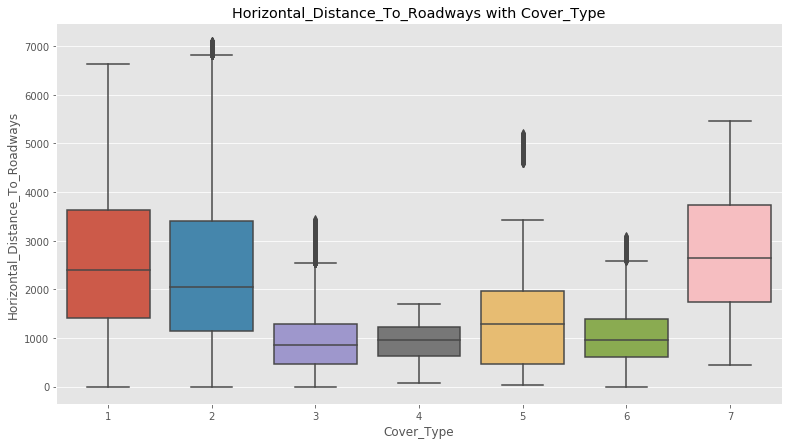

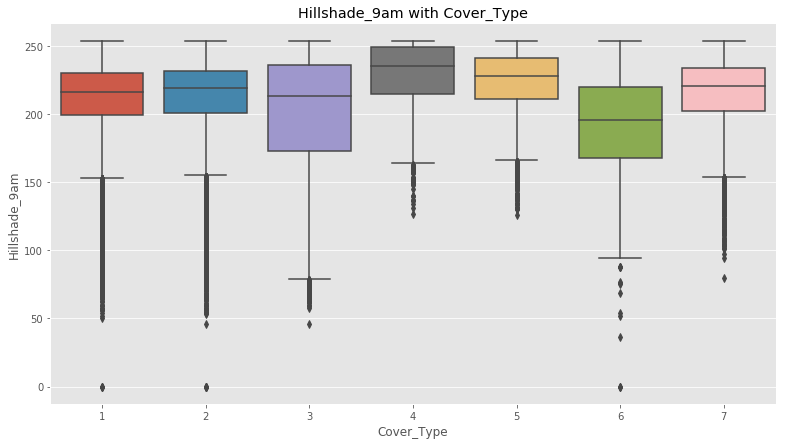

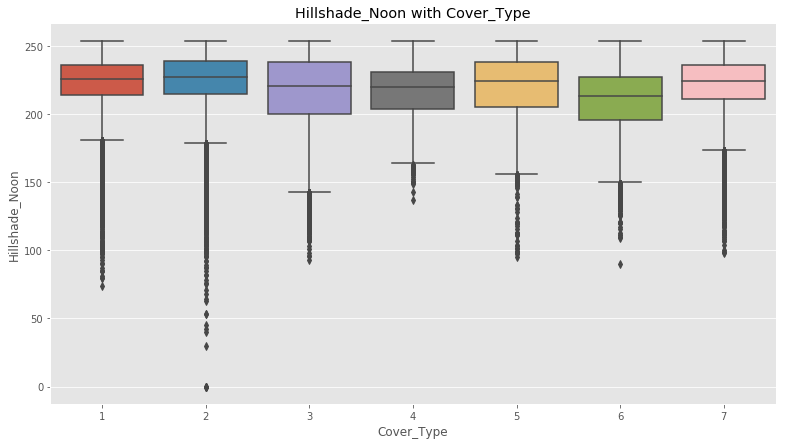

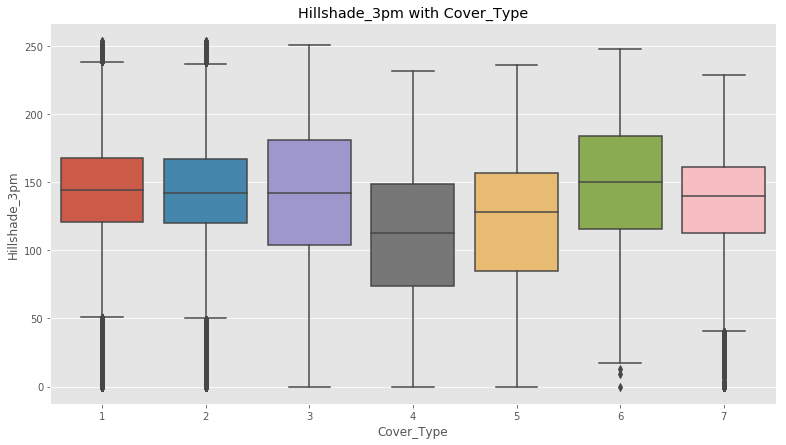

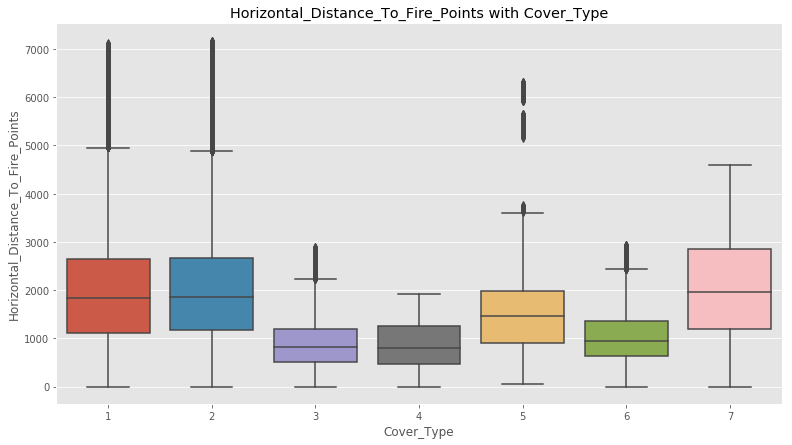

In [16]:
#Boxplot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sb.boxplot(x=data.Cover_Type, y=train[i])
    plt.show()

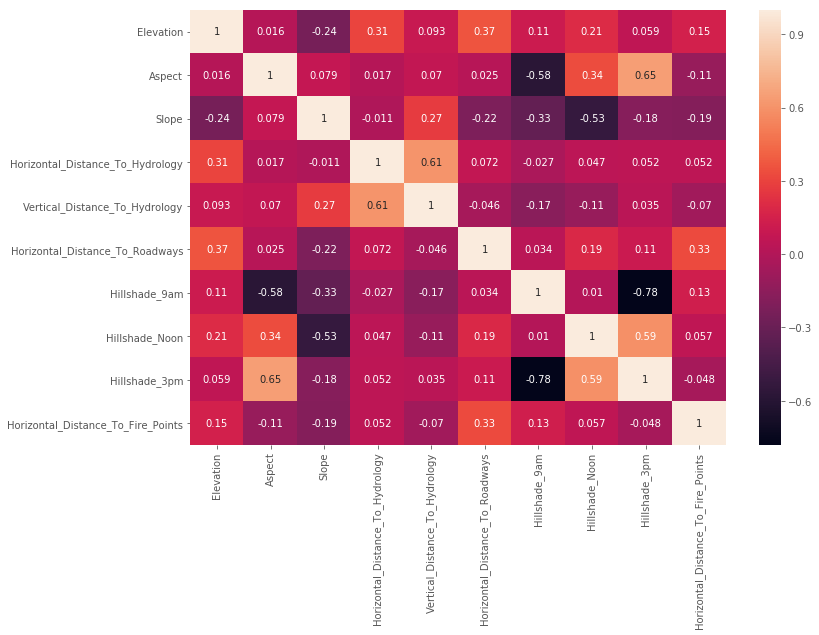

In [17]:
#Corralation
plt.figure(figsize=(12, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = data.iloc[:, :54] #Features of data
y = data.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature) #new features



In [23]:


#shape of new feature
X.shape



(581012, 11)

In [24]:
#Split the data into test and train formate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Accuracy --  94.9646478902329


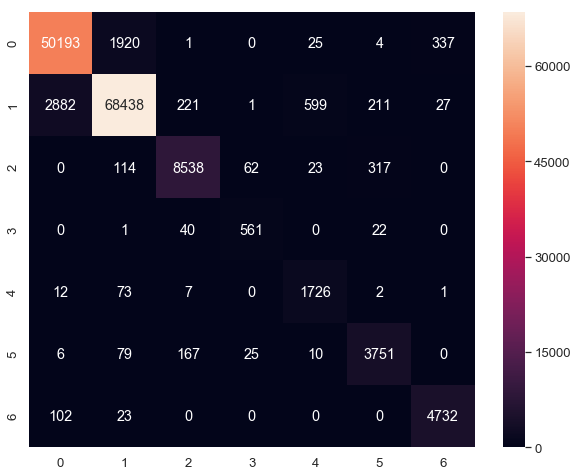

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()